In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

np.set_printoptions(suppress=True)

In [22]:
directory = '../images/Section-4/building/'
img_paths = os.listdir(directory)

images = []
for img_path in img_paths:
    img = mpimg.imread(directory + img_path)
    images.append(img)

<Figure size 432x288 with 0 Axes>

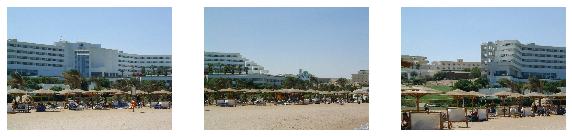

In [23]:
plt.figure()

f, ax = plt.subplots(1, len(images), figsize=(10, 15))

for i in range(len(images)):
    ax[i].imshow(images[i])
    ax[i].axis('off')

plt.show()

<Figure size 432x288 with 0 Axes>

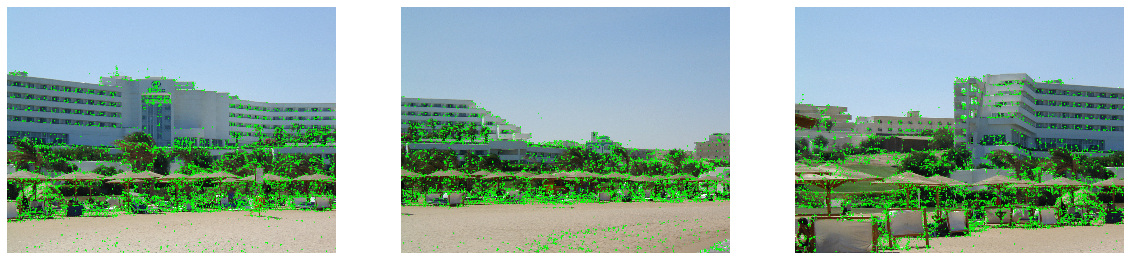

In [24]:
sift = cv2.SIFT_create()

plt.figure()
f, ax = plt.subplots(1, len(images), figsize=(20, 45))

i = 0
kp_list = []
descriptor_list = []
for i in range(len(images)):
    img = images[i]
    bgr_image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    kp, des = sift.detectAndCompute(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY), None)

    kp_list.append(kp)
    descriptor_list.append(des)

    keypoint_img = np.copy(img)
    cv2.drawKeypoints(img, kp, keypoint_img, color = (0, 255, 0))

    ax[i].imshow(keypoint_img)
    ax[i].axis('off')
    i += 1
plt.show()

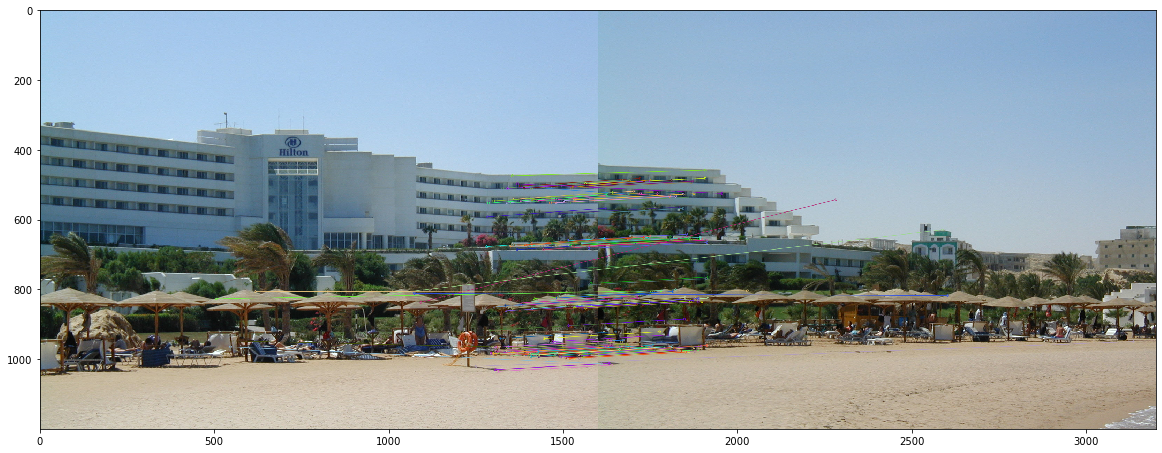

In [35]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(descriptor_list[0], descriptor_list[1])

matches = sorted(matches, key = lambda x:x.distance)

result = cv2.drawMatches(images[0], kp_list[0], images[1], kp_list[1], matches[:150], None, flags=2)

plt.figure(figsize=(20, 20))
plt.imshow(result)
plt.show()

